In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [2]:
df = pd.read_csv(r"C:\Users\basti\OneDrive\Escritorio\Datasets\nyc_taxi_sample.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               500000 non-null  int64  
 1   tpep_pickup_datetime   500000 non-null  object 
 2   tpep_dropoff_datetime  500000 non-null  object 
 3   passenger_count        486188 non-null  float64
 4   trip_distance          500000 non-null  float64
 5   RatecodeID             486188 non-null  float64
 6   PULocationID           500000 non-null  int64  
 7   DOLocationID           500000 non-null  int64  
 8   payment_type           500000 non-null  int64  
 9   fare_amount            500000 non-null  float64
 10  extra                  500000 non-null  float64
 11  mta_tax                500000 non-null  float64
 12  tip_amount             500000 non-null  float64
 13  tolls_amount           500000 non-null  float64
 14  improvement_surcharge  500000 non-nu

In [4]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['dayWeek'] = df['tpep_pickup_datetime'].dt.dayofweek
df['is_weekend'] = df['dayWeekend'].isin([5, 6]).astype(int)
def esNoche(hora):
    return (hora >=22) | (hora <=6)
df['isnight'] = df['pickup_hour'].apply(esNoche).astype(int)
df['is_airport_trip'] = (df['Airport_fee']>0).astype(int)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               500000 non-null  int64         
 1   tpep_pickup_datetime   500000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  500000 non-null  object        
 3   passenger_count        486188 non-null  float64       
 4   trip_distance          500000 non-null  float64       
 5   RatecodeID             486188 non-null  float64       
 6   PULocationID           500000 non-null  int64         
 7   DOLocationID           500000 non-null  int64         
 8   payment_type           500000 non-null  int64         
 9   fare_amount            500000 non-null  float64       
 10  extra                  500000 non-null  float64       
 11  mta_tax                500000 non-null  float64       
 12  tip_amount             500000 non-null  floa

In [6]:
cols_to_drop = [
    "VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "payment_type",
    "total_amount", "extra", "mta_tax", "tip_amount", "tolls_amount",
    "improvement_surcharge", "congestion_surcharge", "Airport_fee",
     "dayWeekend"
]
df = df.drop(columns=cols_to_drop)

In [7]:
df[['passenger_count','RatecodeID']].isnull().sum()
mode_passenger = df['passenger_count'].mode()[0]
df['passenger_count'] = df['passenger_count'].fillna(mode_passenger)
RatecodeID = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(mode_passenger)

In [8]:
df = df.astype({
    'passenger_count': 'int32',      
    'trip_distance': 'float32',       
    'RatecodeID': 'int8',             
    'PULocationID': 'int16',       
    'DOLocationID': 'int16',         
    'fare_amount': 'float32',        
    'pickup_hour': 'int8',             
    'is_weekend': 'int8',             
    'isnight': 'int8',                
    'dayWeek': 'int8',                
    'is_airport_trip': 'int8'         
})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   passenger_count  500000 non-null  int32  
 1   trip_distance    500000 non-null  float32
 2   RatecodeID       500000 non-null  int8   
 3   PULocationID     500000 non-null  int16  
 4   DOLocationID     500000 non-null  int16  
 5   fare_amount      500000 non-null  float32
 6   pickup_hour      500000 non-null  int8   
 7   is_weekend       500000 non-null  int8   
 8   isnight          500000 non-null  int8   
 9   dayWeek          500000 non-null  int8   
 10  is_airport_trip  500000 non-null  int8   
dtypes: float32(2), int16(2), int32(1), int8(6)
memory usage: 10.5 MB


In [10]:
df.describe()

passenger_count  trip_distance     RatecodeID   PULocationID  \
count    500000.000000  500000.000000  500000.000000  500000.000000   
mean          1.352396       4.394863       1.554444     165.587564   
std           0.879331     345.220886       6.877623      64.058410   
min           0.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.070000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.410000       1.000000     234.000000   
max           7.000000  225987.375000      99.000000     265.000000   

        DOLocationID    fare_amount    pickup_hour     is_weekend  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean      164.029636      19.131809      14.281756       0.269062   
std        69.962527      18.500603       5.793709       0.443473   
min         1.000000    -768.099976       0.000000       0.000000   
25%       114.000000       9.300000      11.000000       0.000000   
50%       162.000000      13.500000      15.000000       0.000000   
75%       234.000000      21.200001      19.000000       1.000000   
max       265.000000    1001.900024      23.000000       1.000000   

             isnight        dayWeek  is_airport_trip  
count  500000.000000  500000.000000    500000.000000  
mean        0.185966       3.006288         0.068710  
std         0.389080       1.922482         0.252961  
min         0.000000       0.000000         0.000000  
25%         0.000000       1.000000         0.000000  
50%         0.000000       3.000000         0.000000  
75%         0.000000       5.000000         0.000000  
max         1.000000       6.000000         1.000000

In [11]:
df.groupby('isnight')['fare_amount'].mean()

isnight
0    18.949850
1    19.928299
Name: fare_amount, dtype: float32

In [12]:
df= df[df['fare_amount'] >= 0]
df= df[df['passenger_count'] > 0]
df = df[(df['trip_distance'] < 50) & (df['trip_distance'] > 0)]
df = df[df['RatecodeID'] <=5 ] 


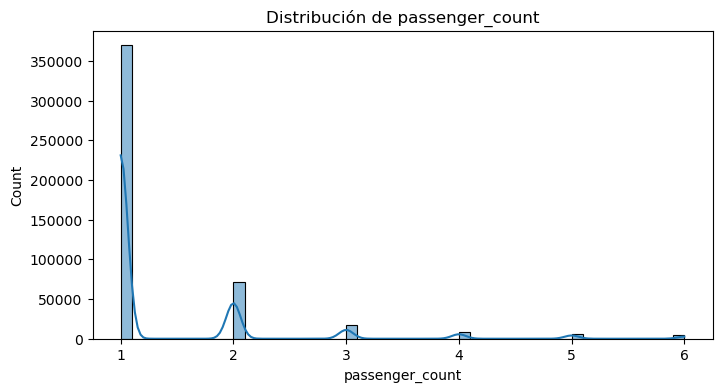

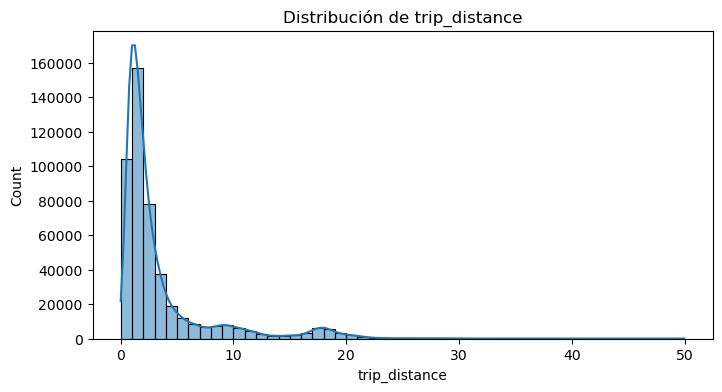

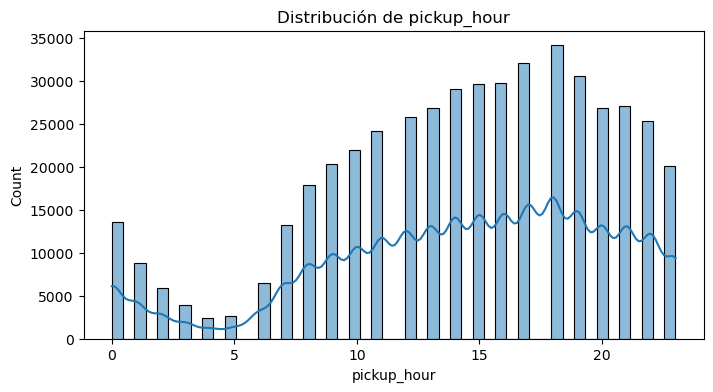

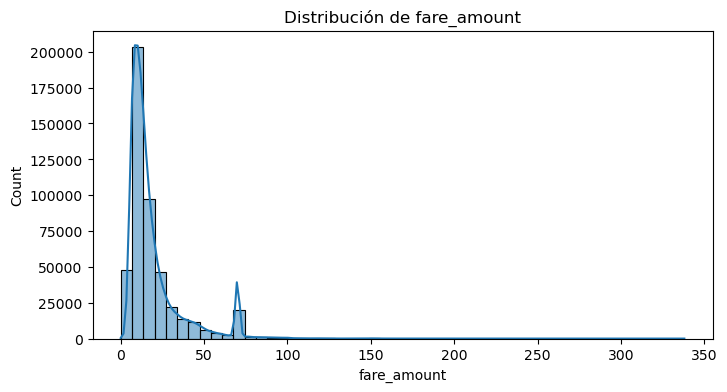

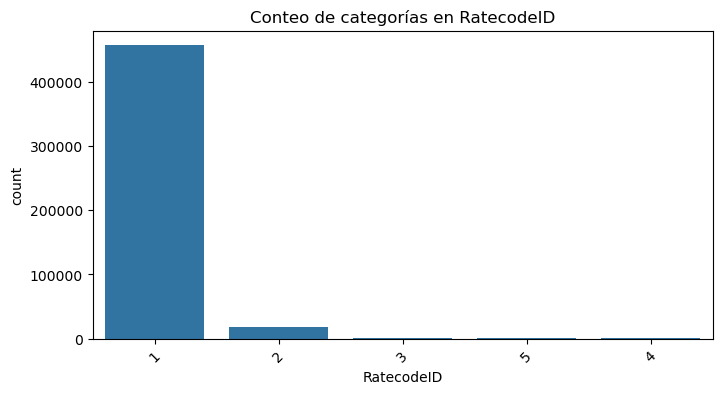

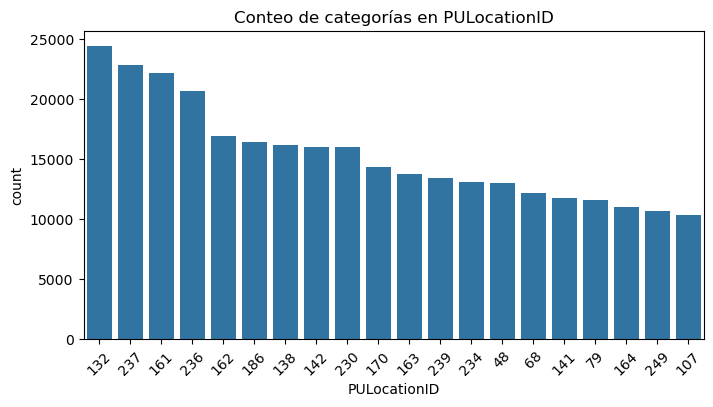

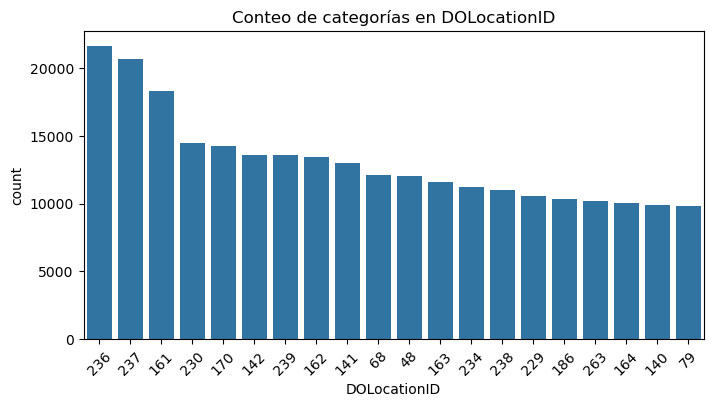

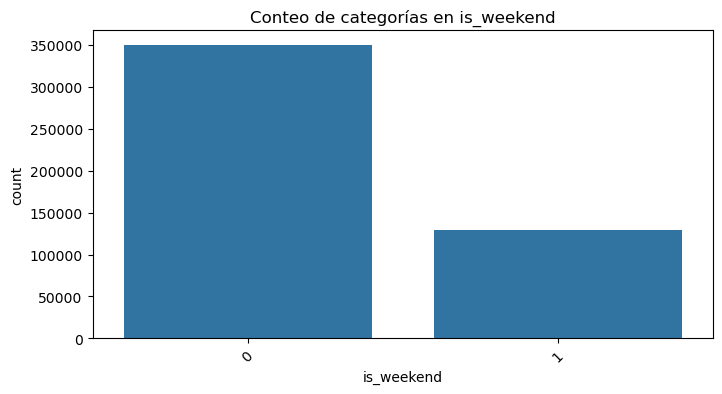

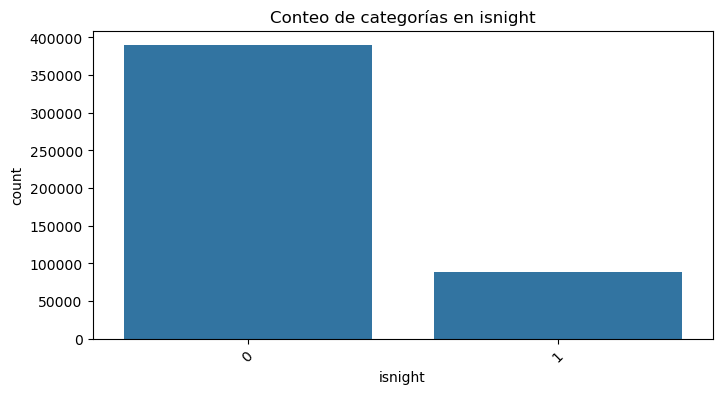

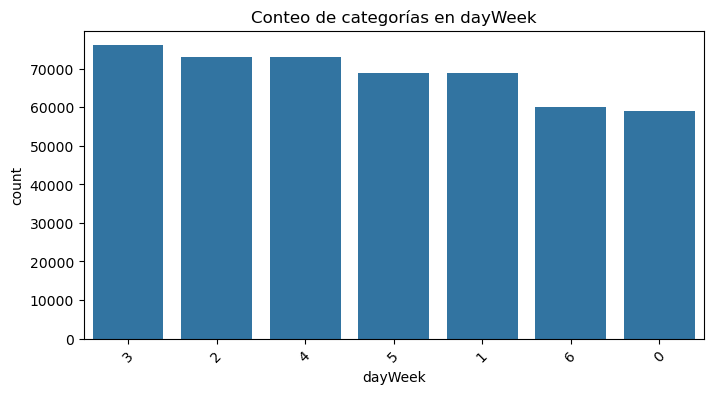

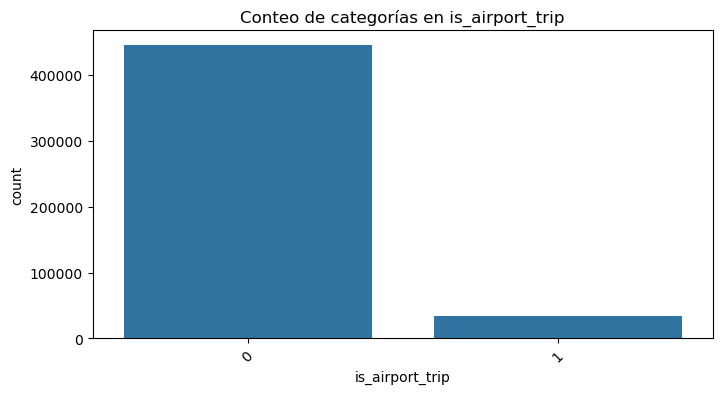

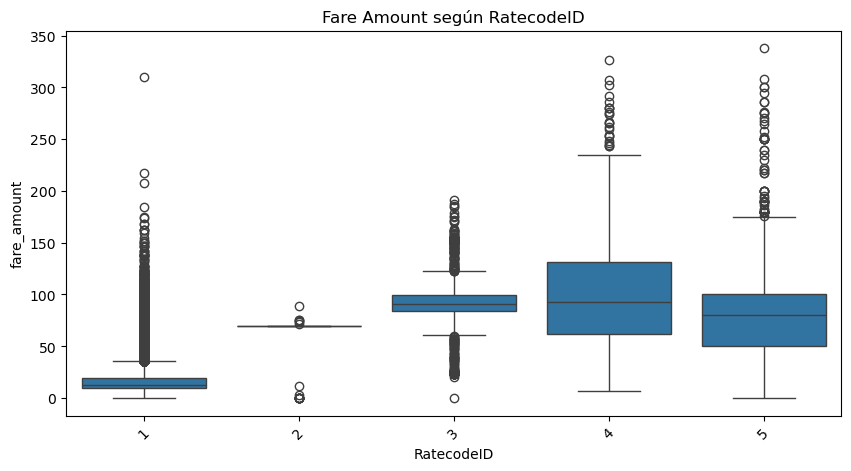

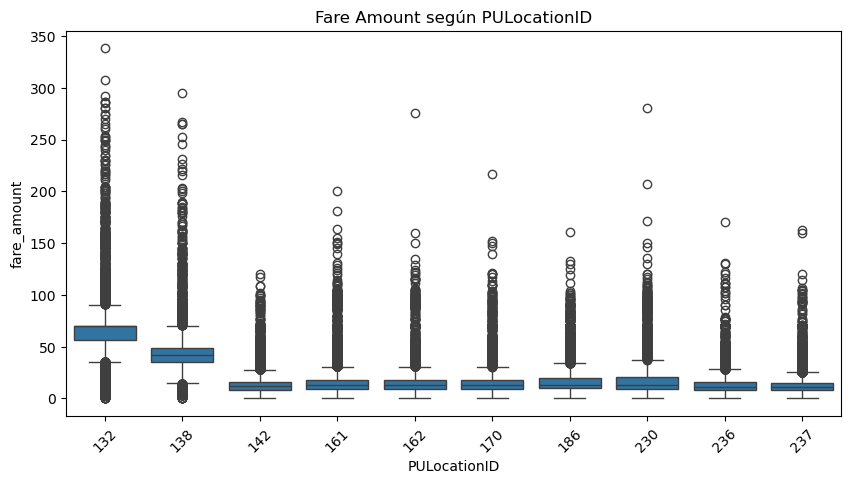

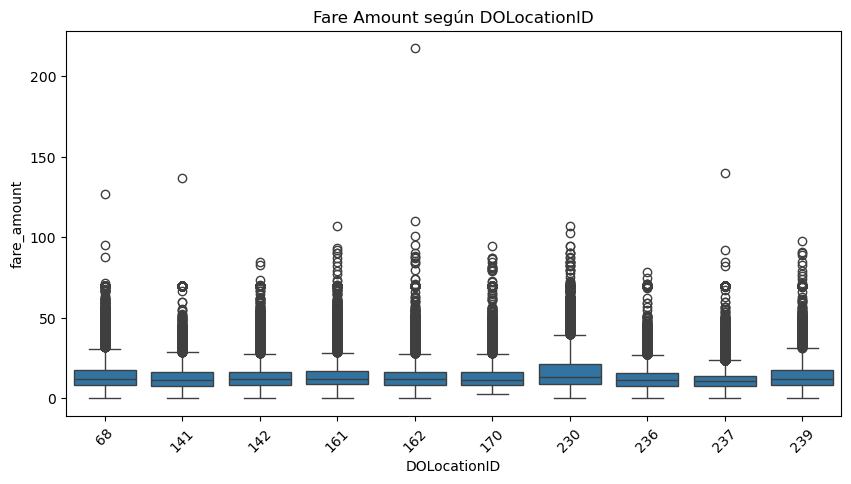

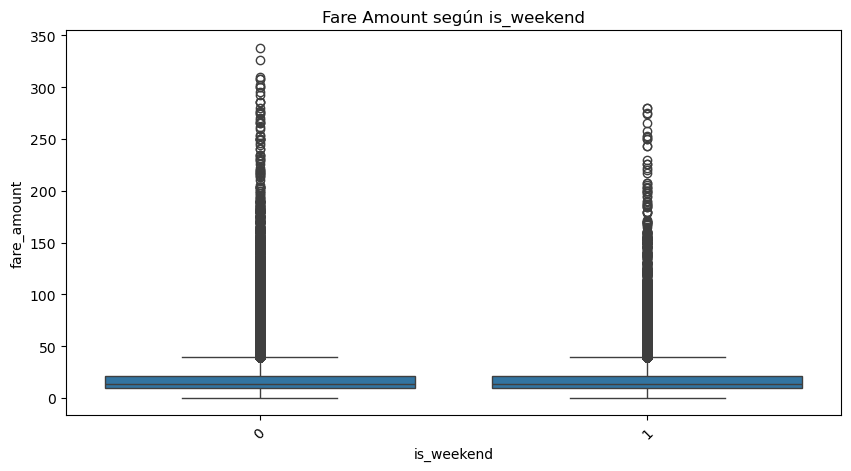

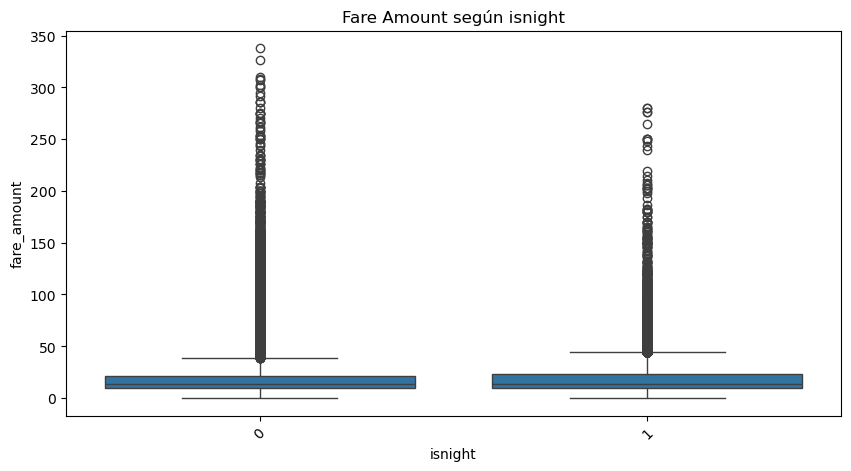

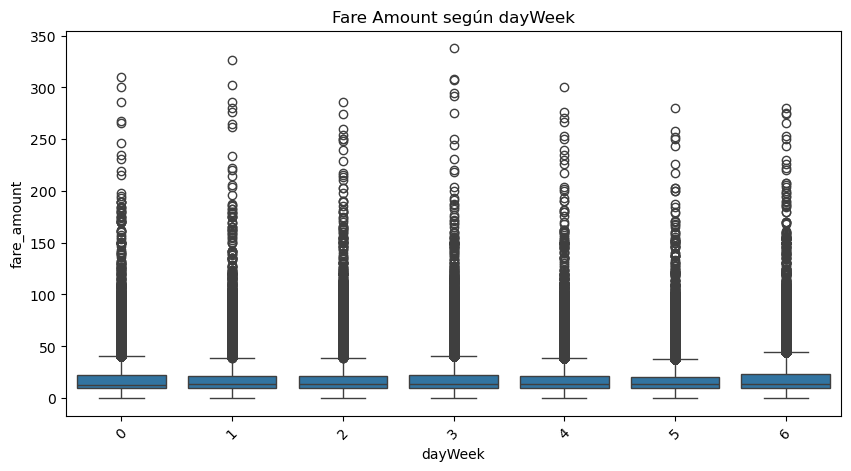

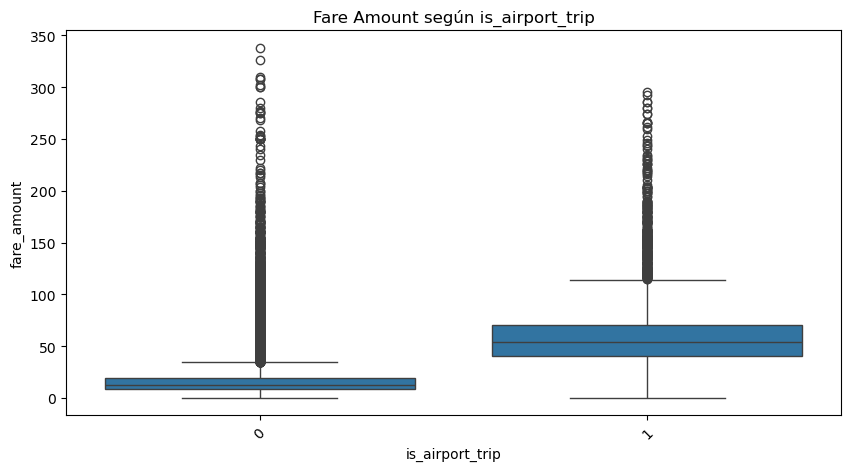

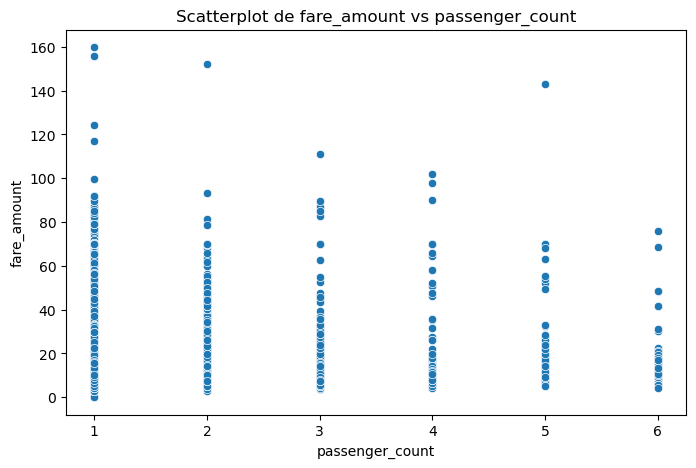

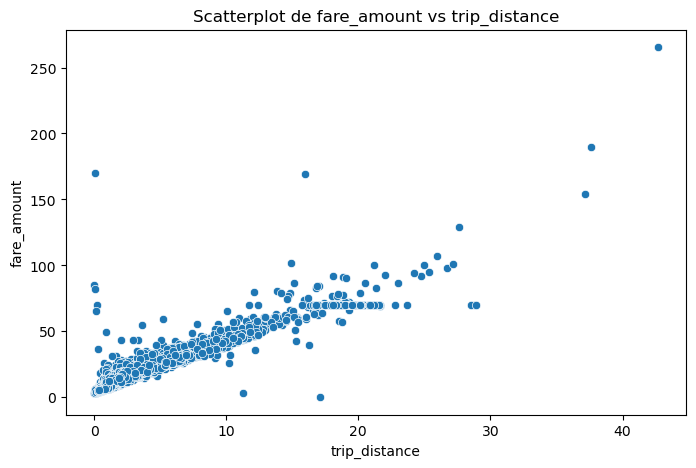

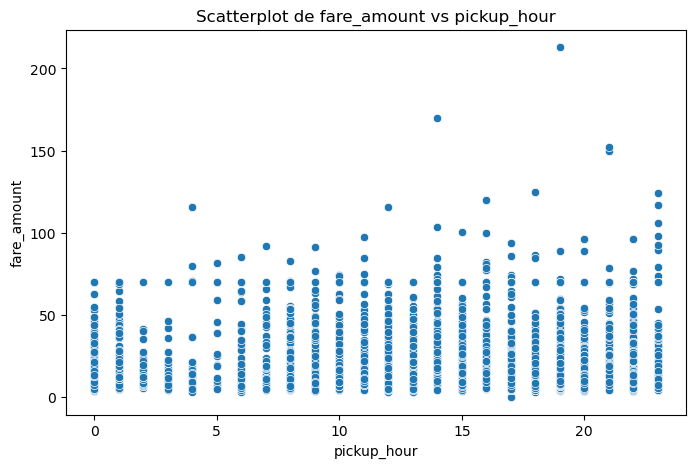

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Listas de variables por tipo
num_vars = ['passenger_count', 'trip_distance', 'pickup_hour', 'fare_amount']
cat_vars = ['RatecodeID', 'PULocationID', 'DOLocationID', 'is_weekend', 'isnight', 'dayWeek', 'is_airport_trip']

# 1. Distribución de variables numéricas (histogramas + KDE)
for col in num_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribución de {col}')
    plt.show()

# 2. Distribución de variables categóricas (barplot de conteos)
for col in cat_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index[:20])  # hasta 20 categorías para no saturar
    plt.title(f'Conteo de categorías en {col}')
    plt.xticks(rotation=45)
    plt.show()

# 3. Boxplots de variables numéricas contra el target 'fare_amount'
# Aquí no tiene sentido porque fare_amount es numérica y sería contra sí misma, así que lo omitimos.

# 4. Boxplots de variables categóricas contra 'fare_amount' (para ver impacto)
for col in cat_vars:
    # Para variables con muchas categorías (como PULocationID, DOLocationID) limitamos a top 10 para no saturar
    if df[col].nunique() > 15:
        top_cats = df[col].value_counts().nlargest(10).index
        data_plot = df[df[col].isin(top_cats)]
    else:
        data_plot = df
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y='fare_amount', data=data_plot)
    plt.title(f'Fare Amount según {col}')
    plt.xticks(rotation=45)
    plt.show()

# 5. Scatterplots para variables numéricas vs 'fare_amount'
for col in num_vars:
    if col != 'fare_amount':  # no se hace scatter contra sí misma
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=col, y='fare_amount', data=df.sample(5000))  # muestreo para que no se trabe
        plt.title(f'Scatterplot de fare_amount vs {col}')
        plt.show()


In [14]:
df.describe()

passenger_count  trip_distance     RatecodeID   PULocationID  \
count    478642.000000  478642.000000  478642.000000  478642.000000   
mean          1.378736       3.497735       1.058616     165.852224   
std           0.872930       4.464471       0.313565      63.850282   
min           1.000000       0.010000       1.000000       1.000000   
25%           1.000000       1.100000       1.000000     132.000000   
50%           1.000000       1.830000       1.000000     162.000000   
75%           1.000000       3.460000       1.000000     234.000000   
max           6.000000      49.980000       5.000000     265.000000   

        DOLocationID    fare_amount    pickup_hour     is_weekend  \
count  478642.000000  478642.000000  478642.000000  478642.000000   
mean      164.178215      19.330305      14.317509       0.269343   
std        69.873017      17.329744       5.792451       0.443619   
min         1.000000       0.000000       0.000000       0.000000   
25%       114.000000       9.300000      11.000000       0.000000   
50%       162.000000      13.500000      15.000000       0.000000   
75%       234.000000      21.200001      19.000000       1.000000   
max       265.000000     338.000000      23.000000       1.000000   

             isnight        dayWeek  is_airport_trip  
count  478642.000000  478642.000000    478642.000000  
mean        0.185895       3.007346         0.069927  
std         0.389022       1.922001         0.255024  
min         0.000000       0.000000         0.000000  
25%         0.000000       1.000000         0.000000  
50%         0.000000       3.000000         0.000000  
75%         0.000000       5.000000         0.000000  
max         1.000000       6.000000         1.000000

In [15]:


# Función para agrupar categorías menos frecuentes en "Otros"
def agrupar_top(df, col, top_n=20):
    top_cats = df[col].value_counts().nlargest(top_n).index
    df[col] = df[col].apply(lambda x: x if x in top_cats else 'Otros')
    return df

# Aplica la función a PULocationID y DOLocationID
df = agrupar_top(df, 'PULocationID', top_n=20)
df = agrupar_top(df, 'DOLocationID', top_n=20)


nominales = ['PULocationID', 'DOLocationID', 'RatecodeID']


df_encoded = pd.get_dummies(df, columns=nominales, drop_first=True)



In [16]:



df_encoded['day_sin'] = np.sin(2 * np.pi * df['dayWeek'] / 7)
df_encoded['day_cos'] = np.cos(2 * np.pi * df['dayWeek'] / 7)


df_encoded['hour_sin'] = np.sin(2 * np.pi * df['pickup_hour'] / 24)
df_encoded['hour_cos'] = np.cos(2 * np.pi * df['pickup_hour'] / 24)

df_encoded.drop(columns=['dayWeek'], inplace=True)
df_encoded.drop(columns=['pickup_hour'], inplace=True)


In [17]:
num_cols = ['passenger_count', 'trip_distance'] # ajusta según tu df
X = df_encoded.drop(columns=['fare_amount'])
y = df_encoded['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [18]:

model = LinearRegression()

# Entrenar el modelo con el set de entrenamiento
model.fit(X_train, y_train)

# Predecir en el set de test
y_pred = model.predict(X_test)

# Evaluar desempeño
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'R2: {r2:.3f}')


MSE: 20.697
MAE: 2.480
R2: 0.931


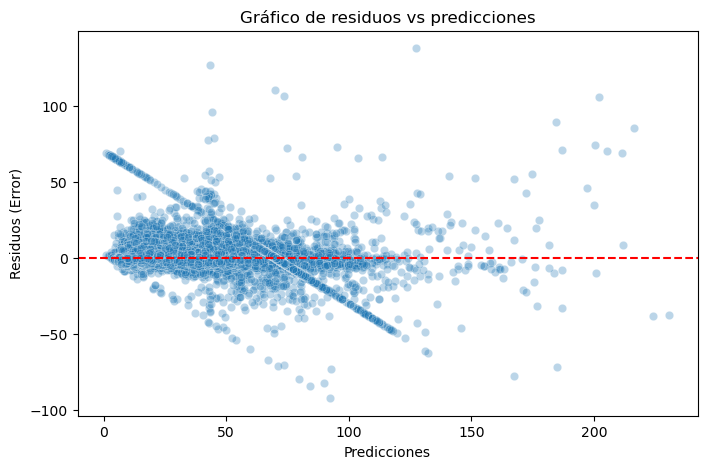

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

residuos = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos (Error)')
plt.title('Gráfico de residuos vs predicciones')
plt.show()


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf:.3f}')
print(f'Random Forest MAE: {mae_rf:.3f}')
print(f'Random Forest R2: {r2_rf:.3f}')


Random Forest MSE: 12.884
Random Forest MAE: 1.936
Random Forest R2: 0.957


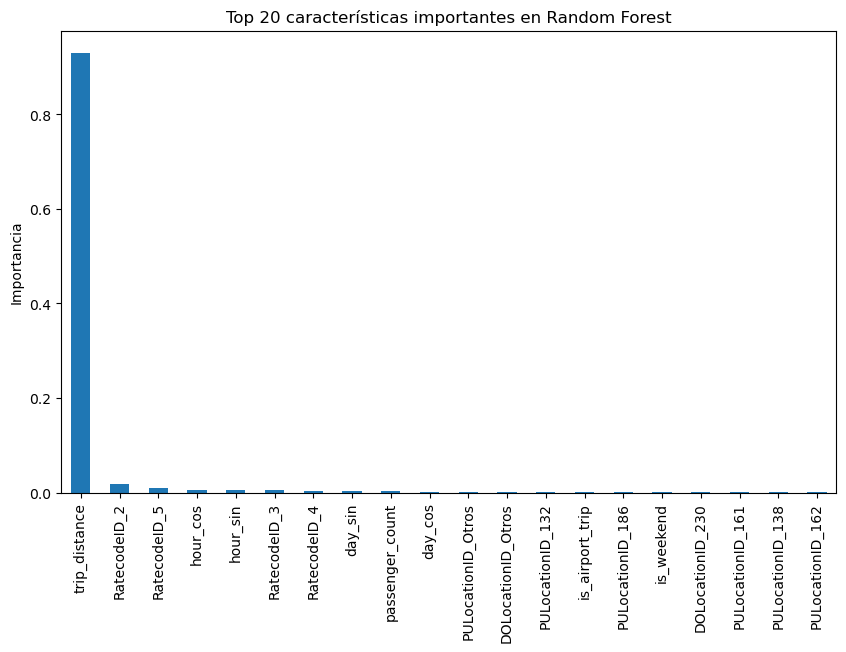

In [21]:

importances = rf.feature_importances_
features = X_train.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.head(20).plot(kind='bar')
plt.title('Top 20 características importantes en Random Forest')
plt.ylabel('Importancia')
plt.show()


In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5, scoring='r2', n_jobs=-1)

print(f'R2 promedio CV: {np.mean(scores):.3f}')
print(f'Desviación estándar CV: {np.std(scores):.3f}')


R2 promedio CV: 0.957
Desviación estándar CV: 0.001


In [28]:
y_pred = y_pred_rf
errors = np.abs(y_test - y_pred)

# Agregamos errores y algunas variables clave a un DataFrame
error_df = X_test.copy()
error_df['fare_amount_real'] = y_test
error_df['fare_amount_pred'] = y_pred
error_df['error'] = errors


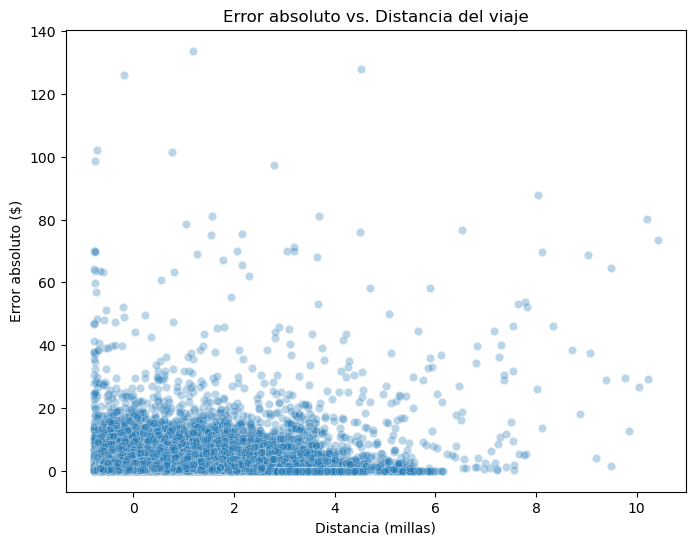

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=error_df['trip_distance'], y=error_df['error'], alpha=0.3)
plt.title("Error absoluto vs. Distancia del viaje")
plt.xlabel("Distancia (millas)")
plt.ylabel("Error absoluto ($)")
plt.show()


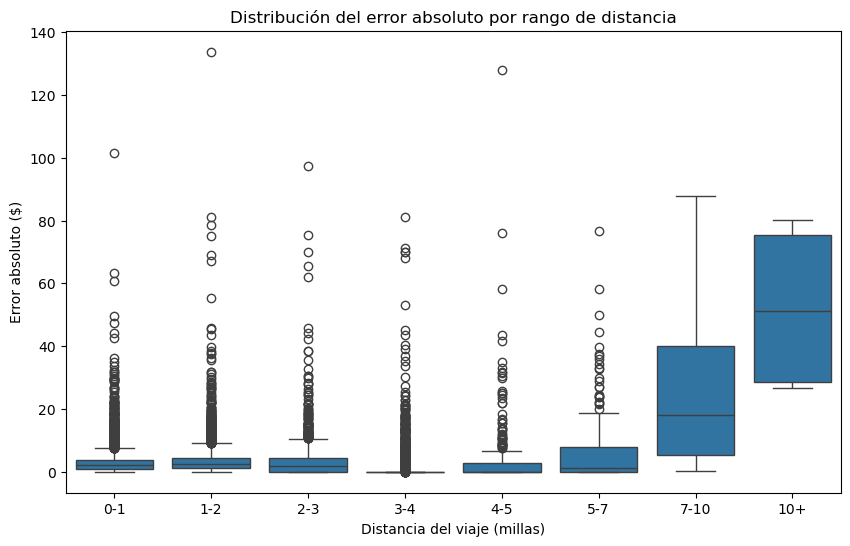

In [30]:
# 1. Calculamos el error absoluto
error_absoluto = np.abs(y_test - y_pred)

# 2. Creamos una copia del set de prueba para graficar
df_error = X_test.copy()
df_error['error_absoluto'] = error_absoluto

# 3. Creamos rangos de distancia (bins)
bins = [0, 1, 2, 3, 4, 5, 7, 10, np.inf]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-7', '7-10', '10+']
df_error['distancia_bin'] = pd.cut(df_error['trip_distance'], bins=bins, labels=labels)

# 4. Hacemos el boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='distancia_bin', y='error_absoluto', data=df_error)
plt.title('Distribución del error absoluto por rango de distancia')
plt.xlabel('Distancia del viaje (millas)')
plt.ylabel('Error absoluto ($)')
plt.show()